# Using SKLearn SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

In [2]:
#import Data
df_sensor = pd.read_csv('Q1.csv')
df_sensor.head()

Timestamp  CHP1Temp1(DegC)  CHP1Temp2(DegC)  CHP2Temp1(DegC)  \
0  3/10/2018 0:00        39.370909        38.637728        40.846605   
1  3/10/2018 0:00        39.390616        38.651286        40.884015   
2  3/10/2018 0:00        39.403041        38.659552        40.926061   
3  3/10/2018 0:00        39.420096        38.677405        40.966947   
4  3/10/2018 0:00        39.430529        38.678065        41.008001   

   CHP2Temp2(DegC)  CHP1Vib1(mm/s)  CHP1Vib2(mm/s)  CHP2Vib1(mm/s)  \
0        39.782834        0.060756        0.066139        0.087974   
1        39.805669        0.070343        0.064768        0.094204   
2        39.817418        0.053073        0.053162        0.085925   
3        39.839593        0.059945        0.061724        0.088830   
4        39.849687        0.072104        0.060607        0.089137   

   CHP2Vib2(mm/s)  Fault  
0        0.097370      0  
1        0.111891      0  
2        0.088741      0  
3        0.100587      0  
4        0.106438      0

In [3]:
#get some information about our Data-Set
df_sensor.info()
df_sensor.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13847 entries, 0 to 13846
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        13847 non-null  object 
 1   CHP1Temp1(DegC)  13847 non-null  float64
 2   CHP1Temp2(DegC)  13847 non-null  float64
 3   CHP2Temp1(DegC)  13847 non-null  float64
 4   CHP2Temp2(DegC)  13847 non-null  float64
 5   CHP1Vib1(mm/s)   13847 non-null  float64
 6   CHP1Vib2(mm/s)   13847 non-null  float64
 7   CHP2Vib1(mm/s)   13847 non-null  float64
 8   CHP2Vib2(mm/s)   13847 non-null  float64
 9   Fault            13847 non-null  int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 1.1+ MB


CHP1Temp1(DegC)  CHP1Temp2(DegC)  CHP2Temp1(DegC)  CHP2Temp2(DegC)  \
count     13847.000000     13847.000000     13847.000000     13847.000000   
mean         38.894831        38.372753        37.049863        37.083295   
std           1.657766         1.818556         2.927990         3.476318   
min          34.272883        33.652465        31.602933        31.247236   
25%          38.336334        37.233618        35.394773        34.523069   
50%          39.569812        39.364623        38.227170        37.395959   
75%          39.970923        39.671286        39.413810        40.465354   
max          41.325293        40.638881        43.187444        41.962697   

       CHP1Vib1(mm/s)  CHP1Vib2(mm/s)  CHP2Vib1(mm/s)  CHP2Vib2(mm/s)  \
count    13847.000000    13847.000000    13847.000000    13847.000000   
mean         0.998612        1.345662        0.934057        1.763645   
std          0.616521        0.853053        0.619965        1.268073   
min          0.046510        0.045864        0.068607        0.082864   
25%          0.070277        0.067707        0.091273        0.108074   
50%          1.322656        1.778066        0.935697        1.670248   
75%          1.473304        1.967611        1.525421        2.952789   
max          1.610700        2.390570        1.785126        3.950299   

              Fault  
count  13847.000000  
mean       0.393082  
std        0.488452  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

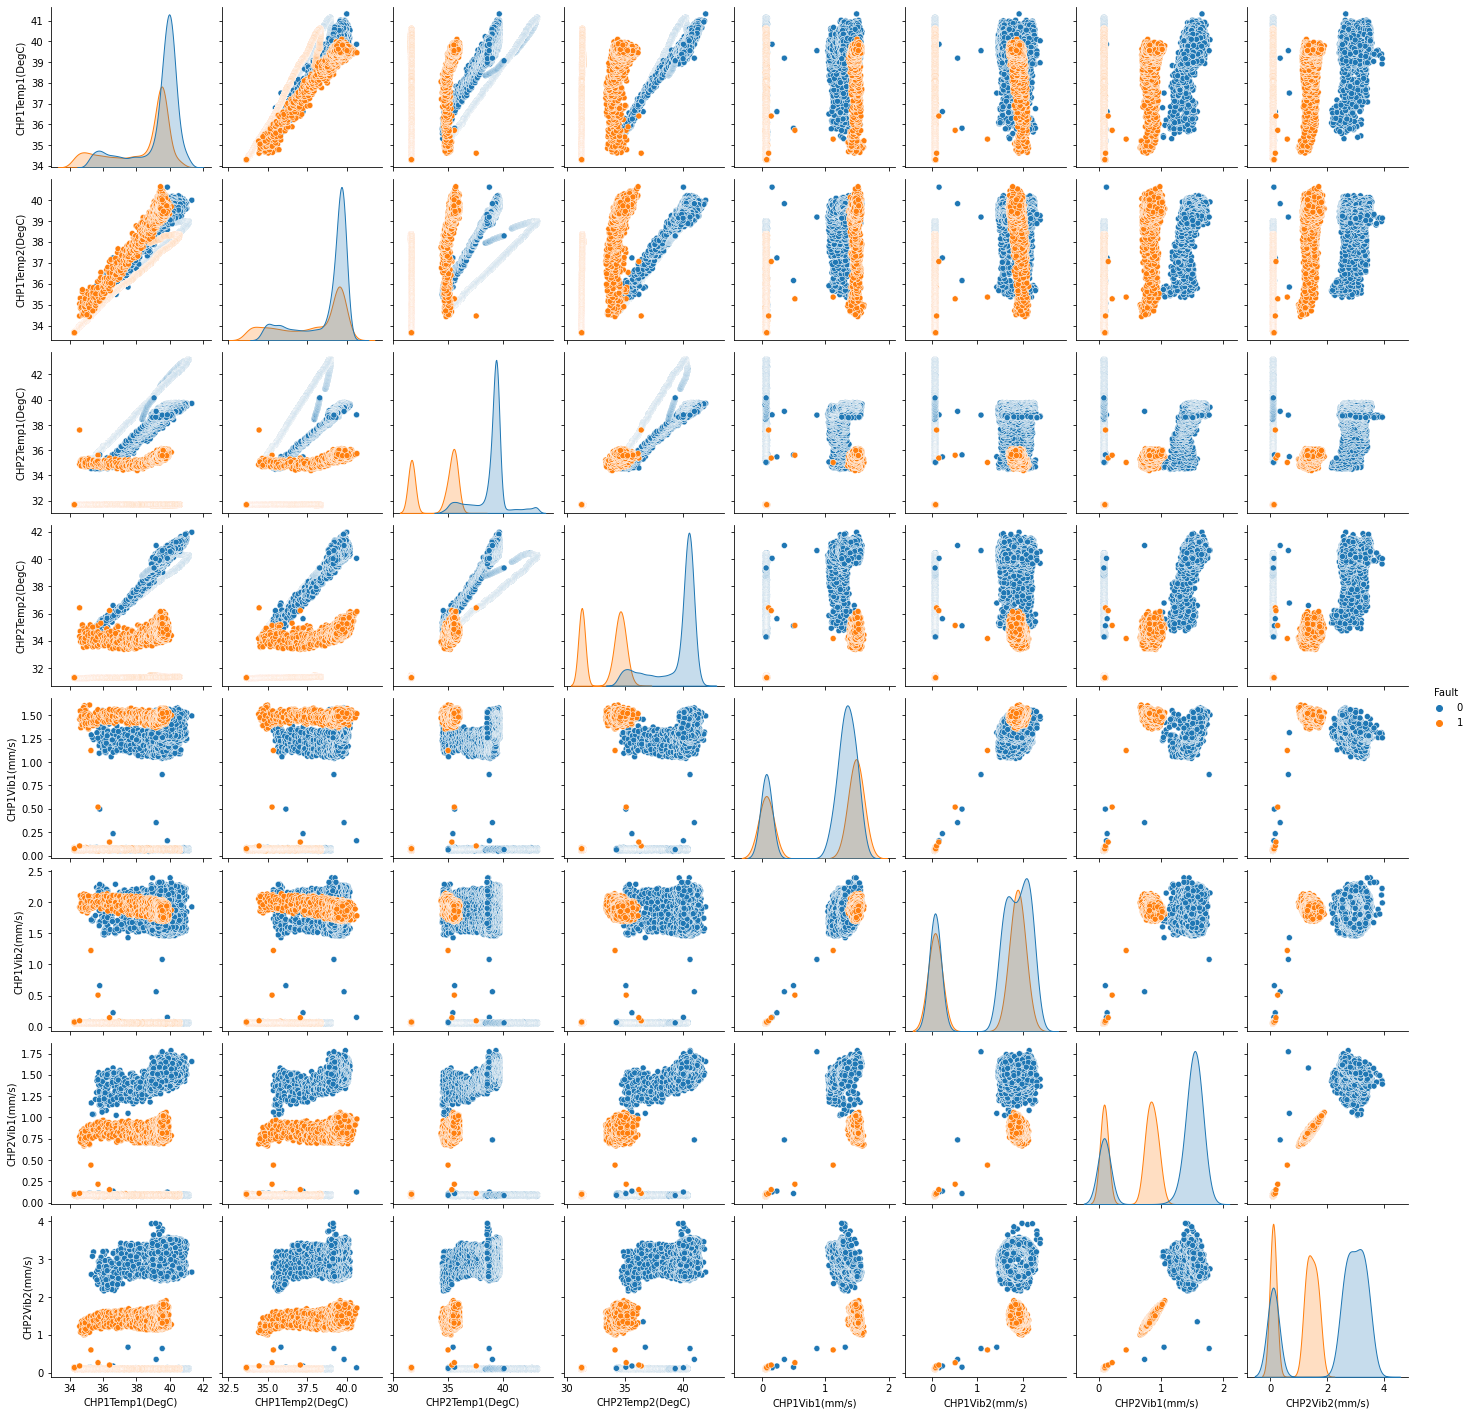

In [4]:
#visualizing data
sns.pairplot(df_sensor, hue = 'Fault')

<AxesSubplot:>

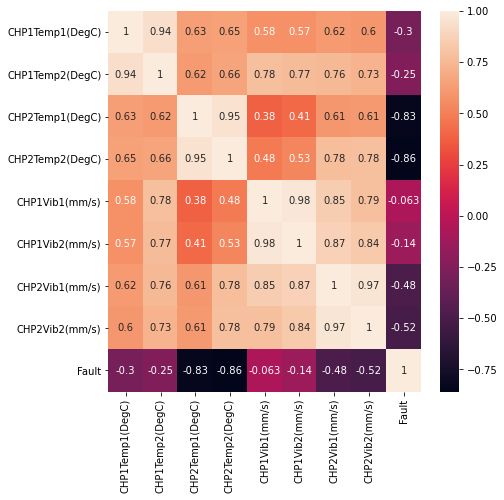

In [5]:
plt.figure(figsize=(7,7))
sns.heatmap(df_sensor['CHP1Temp1(DegC) CHP1Temp2(DegC) CHP2Temp1(DegC) CHP2Temp2(DegC) CHP1Vib1(mm/s) CHP1Vib2(mm/s) CHP2Vib1(mm/s) CHP2Vib2(mm/s) Fault'.split()].corr(), annot=True)

<AxesSubplot:xlabel='CHP1Temp1(DegC)', ylabel='CHP1Vib1(mm/s)'>

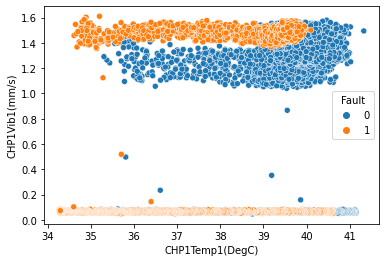

In [6]:
sns.scatterplot(x = 'CHP1Temp1(DegC)', y = 'CHP1Vib1(mm/s)', hue = 'Fault', data = df_sensor)

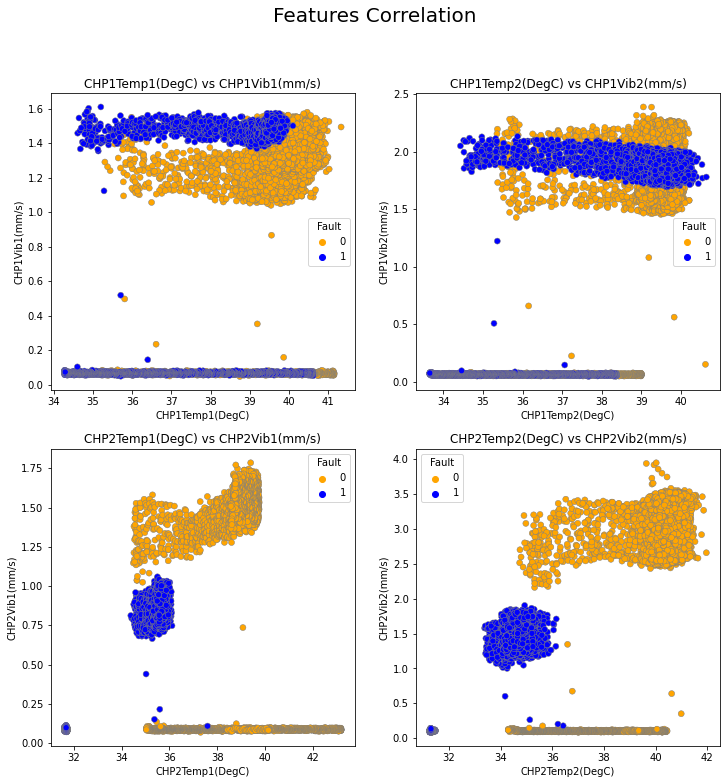

In [7]:
#visualizing features correlation
palette ={0 : 'orange', 1 : 'blue'}
edgecolor = 'grey'
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df_sensor['CHP1Temp1(DegC)'], y = df_sensor['CHP1Vib1(mm/s)'], hue = "Fault",
data = df_sensor, palette =palette, edgecolor=edgecolor)
plt.title('CHP1Temp1(DegC) vs CHP1Vib1(mm/s)')

plt.subplot(222)
ax2 = sns.scatterplot(x = df_sensor['CHP1Temp2(DegC)'], y = df_sensor['CHP1Vib2(mm/s)'], hue = "Fault",
data = df_sensor, palette =palette, edgecolor=edgecolor)
plt.title('CHP1Temp2(DegC) vs CHP1Vib2(mm/s)')

plt.subplot(223)
ax3 = sns.scatterplot(x = df_sensor['CHP2Temp1(DegC)'], y = df_sensor['CHP2Vib1(mm/s)'], hue = "Fault",
data = df_sensor, palette =palette, edgecolor=edgecolor)
plt.title('CHP2Temp1(DegC) vs CHP2Vib1(mm/s)')

plt.subplot(224)
ax4 = sns.scatterplot(x = df_sensor['CHP2Temp2(DegC)'], y = df_sensor['CHP2Vib2(mm/s)'], hue = "Fault",
data = df_sensor, palette =palette, edgecolor=edgecolor)
plt.title('CHP2Temp2(DegC) vs CHP2Vib2(mm/s)')

fig.suptitle('Features Correlation', fontsize = 20)
plt.savefig('2')
plt.show()

In [8]:
# check how many values are missing (NaN)
# here we do not have any missing values
df_sensor.isnull().sum()

Timestamp          0
CHP1Temp1(DegC)    0
CHP1Temp2(DegC)    0
CHP2Temp1(DegC)    0
CHP2Temp2(DegC)    0
CHP1Vib1(mm/s)     0
CHP1Vib2(mm/s)     0
CHP2Vib1(mm/s)     0
CHP2Vib2(mm/s)     0
Fault              0
dtype: int64

Text(0.5, 1.0, 'number of Normal 0 vs Fault 1')

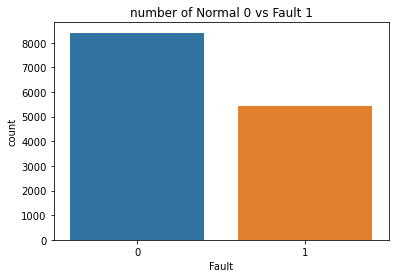

In [9]:
#visualizing diagnosis column >>> 'benign':0,'malignant':1
sns.countplot(x='Fault',data = df_sensor)
plt.title('number of Normal 0 vs Fault 1')

Text(0.5, 1.0, 'Corr. between features and target')

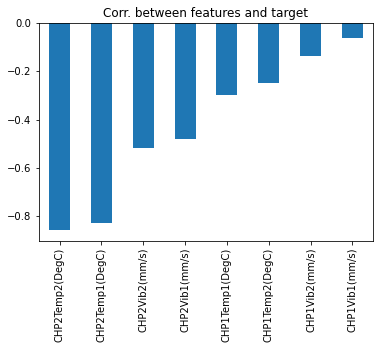

In [10]:
# correlation between features
df_sensor.corr()['Fault'][:-1].sort_values().plot(kind ='bar')
plt.title('Corr. between features and target')

In [11]:
display(df_sensor)

Timestamp  CHP1Temp1(DegC)  CHP1Temp2(DegC)  CHP2Temp1(DegC)  \
0        3/10/2018 0:00        39.370909        38.637728        40.846605   
1        3/10/2018 0:00        39.390616        38.651286        40.884015   
2        3/10/2018 0:00        39.403041        38.659552        40.926061   
3        3/10/2018 0:00        39.420096        38.677405        40.966947   
4        3/10/2018 0:00        39.430529        38.678065        41.008001   
...                 ...              ...              ...              ...   
13842  10/17/2018 15:31        39.781958        39.366774        35.699109   
13843  10/17/2018 15:32        39.628272        39.461169        35.665838   
13844  10/17/2018 15:32        39.612208        39.890494        35.971746   
13845  10/17/2018 15:45        39.822699        39.725013        35.558900   
13846  10/17/2018 15:45        39.552752        40.011008        35.570325   

       CHP2Temp2(DegC)  CHP1Vib1(mm/s)  CHP1Vib2(mm/s)  CHP2Vib1(mm/s)  \
0            39.782834        0.060756        0.066139        0.087974   
1            39.805669        0.070343        0.064768        0.094204   
2            39.817418        0.053073        0.053162        0.085925   
3            39.839593        0.059945        0.061724        0.088830   
4            39.849687        0.072104        0.060607        0.089137   
...                ...             ...             ...             ...   
13842        34.977640        1.487568        1.888282        1.005966   
13843        35.052602        1.489291        1.752119        1.001954   
13844        34.636423        1.482300        1.850078        1.018153   
13845        34.845422        1.528402        1.937668        0.818741   
13846        35.247537        1.521452        1.864466        0.813967   

       CHP2Vib2(mm/s)  Fault  
0            0.097370      0  
1            0.111891      0  
2            0.088741      0  
3            0.100587      0  
4            0.106438      0  
...               ...    ...  
13842        1.792363      1  
13843        1.742410      1  
13844        1.804849      1  
13845        1.351930      1  
13846        1.312562      1  

[13847 rows x 10 columns]

In [12]:
df_sensor.drop('Timestamp', axis=1, inplace=True)

In [13]:
df_sensor

CHP1Temp1(DegC)  CHP1Temp2(DegC)  CHP2Temp1(DegC)  CHP2Temp2(DegC)  \
0            39.370909        38.637728        40.846605        39.782834   
1            39.390616        38.651286        40.884015        39.805669   
2            39.403041        38.659552        40.926061        39.817418   
3            39.420096        38.677405        40.966947        39.839593   
4            39.430529        38.678065        41.008001        39.849687   
...                ...              ...              ...              ...   
13842        39.781958        39.366774        35.699109        34.977640   
13843        39.628272        39.461169        35.665838        35.052602   
13844        39.612208        39.890494        35.971746        34.636423   
13845        39.822699        39.725013        35.558900        34.845422   
13846        39.552752        40.011008        35.570325        35.247537   

       CHP1Vib1(mm/s)  CHP1Vib2(mm/s)  CHP2Vib1(mm/s)  CHP2Vib2(mm/s)  Fault  
0            0.060756        0.066139        0.087974        0.097370      0  
1            0.070343        0.064768        0.094204        0.111891      0  
2            0.053073        0.053162        0.085925        0.088741      0  
3            0.059945        0.061724        0.088830        0.100587      0  
4            0.072104        0.060607        0.089137        0.106438      0  
...               ...             ...             ...             ...    ...  
13842        1.487568        1.888282        1.005966        1.792363      1  
13843        1.489291        1.752119        1.001954        1.742410      1  
13844        1.482300        1.850078        1.018153        1.804849      1  
13845        1.528402        1.937668        0.818741        1.351930      1  
13846        1.521452        1.864466        0.813967        1.312562      1  

[13847 rows x 9 columns]

In [14]:
#define X variables and our target(y)
X = df_sensor.drop(['Fault'],axis=1).values
y = df_sensor['Fault'].values

# Train using shuffling and separate data 20% as test and 80% as train

In [15]:
#split Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# from sklearn.naive_bayes import GaussianNB
from sklearn import svm, datasets
from sklearn.naive_bayes import GaussianNB

modelFit = GaussianNB().fit(X_train, y_train)
predicted = modelFit.predict(X_test)
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)
print('Sensor dataset')
print(modelFit)
print('Accuracy of GaussianNB classifier on training set: {:.2f}'. format(modelFit.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'. format(modelFit.score(X_test, y_test)))
print('Accuracy of SVM Linear classifier on test set: {:.2f}'. format(classifier.score(X_train, y_train)))

Sensor dataset
GaussianNB()
Accuracy of GaussianNB classifier on training set: 0.91
Accuracy of GaussianNB classifier on test set: 0.91
Accuracy of SVM Linear classifier on test set: 1.00


# Show the train result using test data and predicted model

In [18]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

print("Classification report for classifier %s:\n %s \n" % (modelFit, metrics.classification_report(y_test, predicted)))

Classification report for classifier GaussianNB():
               precision    recall  f1-score   support

           0       1.00      0.86      0.92      1662
           1       0.82      1.00      0.90      1108

    accuracy                           0.91      2770
   macro avg       0.91      0.93      0.91      2770
weighted avg       0.93      0.91      0.91      2770
 



Confusion matrix:
[[1422  240]
 [   0 1108]]


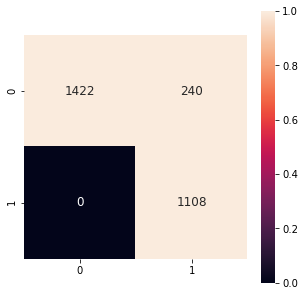

In [19]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predicted))

plt.figure(figsize=(5,5))
heat = sns.heatmap(metrics.confusion_matrix(y_test, predicted), vmax=1, square=True, annot=True, fmt='n', annot_kws={"size": 12})

In [20]:
#Support Vector Classification model
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

<AxesSubplot:>

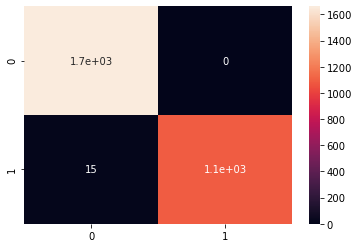

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [22]:
#normalized scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()
X_train_scaled = n_scaler.fit_transform(X_train.astype(np.float))
X_test_scaled = n_scaler.transform(X_test.astype(np.float))

<ipython-input-22-d02bfa8aaf42>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_scaled = n_scaler.fit_transform(X_train.astype(np.float))
<ipython-input-22-d02bfa8aaf42>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_scaled = n_scaler.transform(X_test.astype(np.float))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1662
           1       1.00      1.00      1.00      1108

    accuracy                           1.00      2770
   macro avg       1.00      1.00      1.00      2770
weighted avg       1.00      1.00      1.00      2770



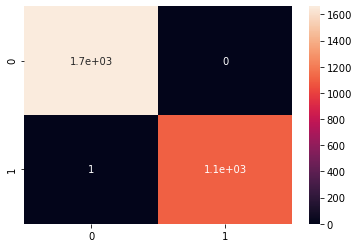

In [23]:
#Support Vector Classification model -  apply on scaled data
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)
from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.1s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   5.5s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

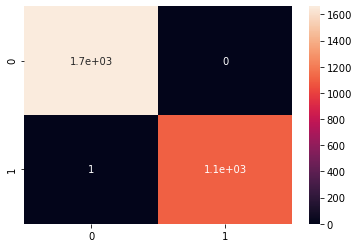

In [24]:
#find best hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train_scaled,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test_scaled)
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))

In [25]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [26]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [27]:
X.shape, y.shape

((13847, 8), (13847,))

# Plot data visualization

In [28]:
X,y

(array([[39.370909, 38.637728, 40.846605, ...,  0.066139,  0.087974,
          0.09737 ],
        [39.390616, 38.651286, 40.884015, ...,  0.064768,  0.094204,
          0.111891],
        [39.403041, 38.659552, 40.926061, ...,  0.053162,  0.085925,
          0.088741],
        ...,
        [39.612208, 39.890494, 35.971746, ...,  1.850078,  1.018153,
          1.804849],
        [39.822699, 39.725013, 35.5589  , ...,  1.937668,  0.818741,
          1.35193 ],
        [39.552752, 40.011008, 35.570325, ...,  1.864466,  0.813967,
          1.312562]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

No handles with labels found to put in legend.


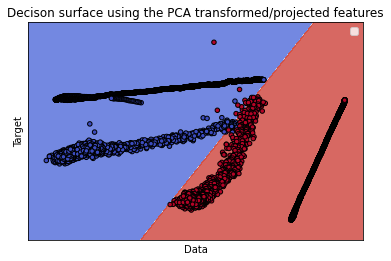

In [29]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Target')
ax.set_xlabel('Data')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()
